In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
class Model(nn.Module):

    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        # how many Layers?
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

        #Input Layer (4 features) --> h1 N --> h2 N --> output (3 classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [5]:
torch.manual_seed(32)
model = Model()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv("Data/iris.csv")

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [10]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


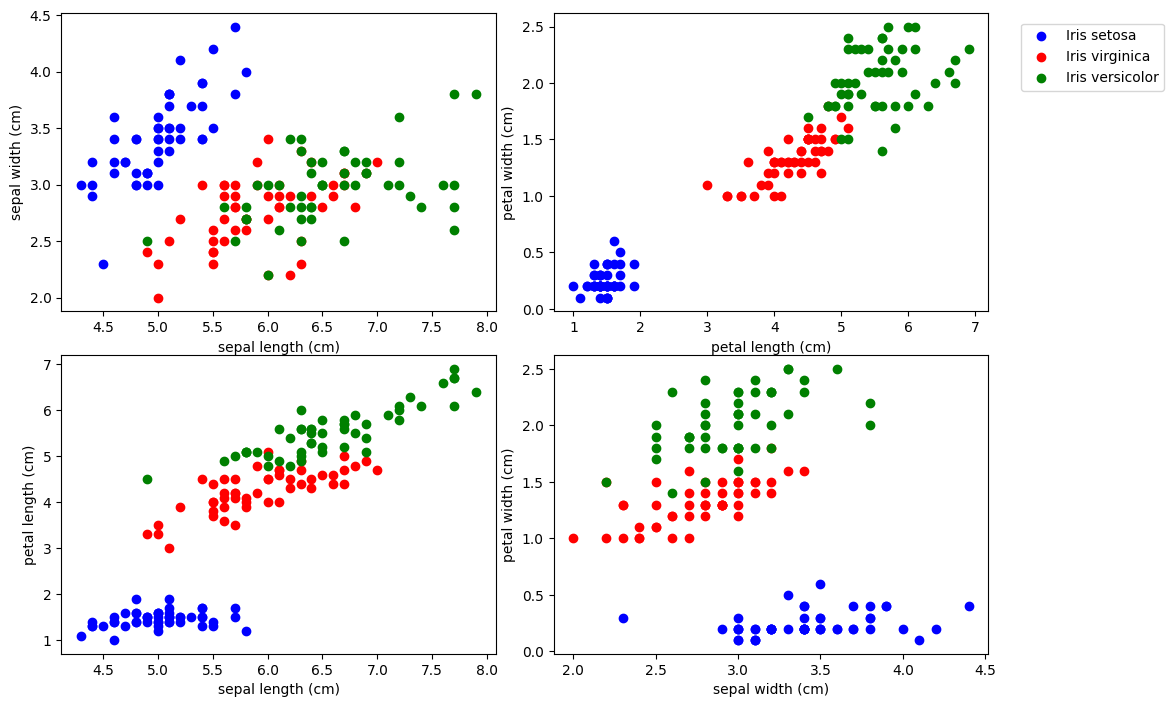

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [12]:
X = df.drop("target", axis=1).values
y = df.target.values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [15]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [16]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [21]:
model.parameters()

<generator object Module.parameters at 0x7fe70143eea0>

In [22]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [23]:
# Epochs ?
# An epoch, 1 run through all the training data

epochs = 100
losses = []

for i in range(epochs):
    # Forward and get a prediction

    y_pred = model.forward(X_train)

    # Calculate Loss/Error
    loss = criterion(y_pred, y_train)

    losses.append(loss)

    if i%10 == 0 :
        print(f"epoch {i} loss is: {loss}")

    # Backpropagation

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



epoch 0 loss is: 1.1507114171981812
epoch 10 loss is: 0.9377314448356628
epoch 20 loss is: 0.7798256278038025
epoch 30 loss is: 0.6099401712417603
epoch 40 loss is: 0.40079936385154724
epoch 50 loss is: 0.25436320900917053
epoch 60 loss is: 0.15053053200244904
epoch 70 loss is: 0.10086946934461594
epoch 80 loss is: 0.08128314465284348
epoch 90 loss is: 0.0723142996430397


Text(0.5, 0, 'Epoch')

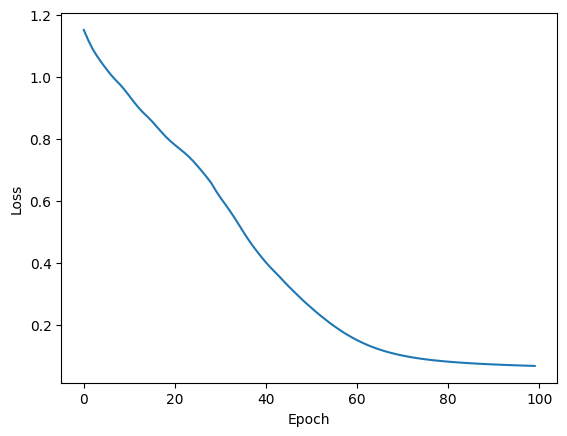

In [24]:
fl = [l.item() for l in losses]
plt.plot(range(epochs), fl)
plt.ylabel("Loss")
plt.xlabel("Epoch")

In [25]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [26]:
loss

tensor(0.0581)

In [32]:
correct = 0

with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        print(f"Data {i+1}.)    {str(y_val.argmax().item())}    {y_test[i]}")

        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f"We got {correct} correct!")

Data 1.)    1    1
Data 2.)    1    1
Data 3.)    0    0
Data 4.)    1    1
Data 5.)    2    2
Data 6.)    2    2
Data 7.)    0    0
Data 8.)    0    0
Data 9.)    2    2
Data 10.)    2    2
Data 11.)    2    2
Data 12.)    0    0
Data 13.)    2    2
Data 14.)    1    1
Data 15.)    2    2
Data 16.)    1    1
Data 17.)    2    2
Data 18.)    0    0
Data 19.)    1    1
Data 20.)    2    2
Data 21.)    0    0
Data 22.)    0    0
Data 23.)    2    2
Data 24.)    0    0
Data 25.)    2    2
Data 26.)    2    2
Data 27.)    1    1
Data 28.)    1    1
Data 29.)    2    2
Data 30.)    2    2
We got 30 correct!


In [33]:
torch.save(model.state_dict(), "my_iris_model.pt")

In [35]:
new_model = Model() # ?? W or B
new_model.load_state_dict(torch.load("my_iris_model.pt"))

<All keys matched successfully>

In [36]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [37]:
torch.save(model, "my_iris_model.pkl")

In [39]:
new_model = torch.load("my_iris_model.pkl")
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [40]:
mystery_iris = torch.tensor([5.6, 3.7, 2.2, 0.5])

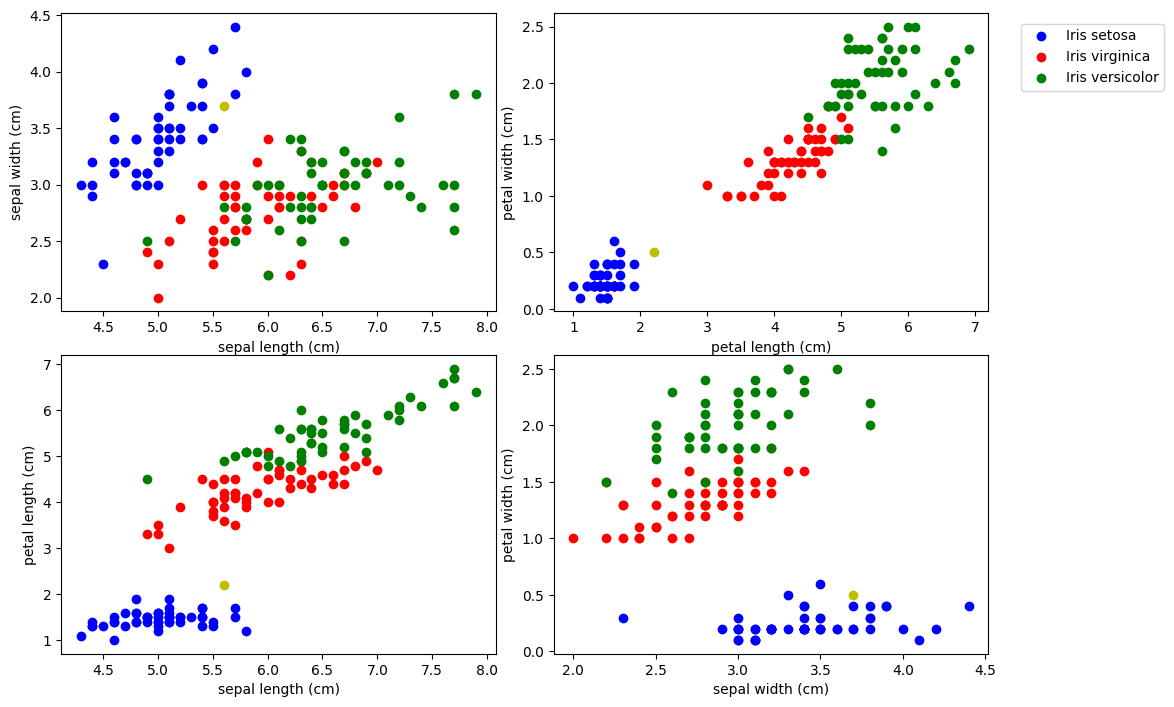

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
    # Add a plot for our mystery iris:
    ax.scatter(mystery_iris[plots[i][0]], mystery_iris[plots[i][1]], color="y")

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [43]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print(new_model(mystery_iris).argmax())

tensor([  5.9522,   1.5596, -10.0054])
tensor(0)
